## 집 가격 예측 프로젝트(kaggle 필사)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

#### Import Data

In [5]:
train = pd.read_csv("../kaggle/House Prices/train.csv")
test= pd.read_csv("../kaggle/House Prices/test.csv")

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### There are many missing data in these columns...

In [18]:
train.isna().sum().sort_values(ascending=False)[:19]
# 19개의 컬럼에 nan 값이 있음을 알 수 있음.

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [19]:
train.isna().sum().sort_values(ascending=False)[:19].index # 컬럼 항목 반환

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [21]:
# 여기서 결측치가 많은 상위 6개 항목을 제외하도록 함.
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [23]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

#### Continuous Variables

In [24]:
# unique(): 데이터의 고윳값들이 어떤 종류가 있는지 알고 싶을때 사용하는 함수
# nunique(): 데이터의 고윳값들의 수를 출력해주는 함수
continuous_variable = train.columns[train.nunique() > 20]
continuous_variable = train[continuous_variable]

In [27]:
continuous_variable.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


#### Categorical Variables

In [28]:
Categorical = train.columns[train.nunique() <= 15]
Categorical = train[Categorical]

In [29]:
Categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.0,2.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.0,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.0,0.0,1.0,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.0,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.0,1.0,1.0,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.0,14.0


#### Exploratory Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_5056\1523518868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr().nlargest(20, "SalePrice")


<Axes: >

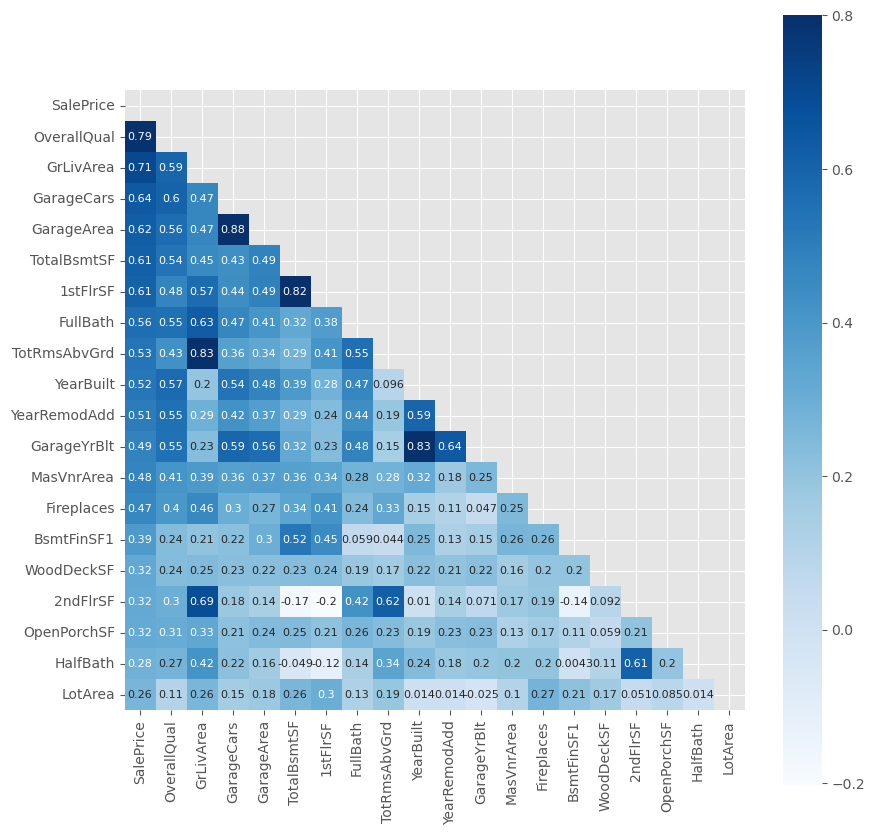

In [30]:
corrmat = train.corr().nlargest(20, "SalePrice")
corrmat = corrmat.T.sort_values("SalePrice", ascending=False)[:20]
# triu: 행렬을 다룰 때, 상삼각행렬에 해당하는 원소만 남길 수 있게 해주는 함수
# ones_like: matrix나 vector를 파라미터로 전달받아, 동일한 크기의 matrix 혹은 vector를 생성하여 1로 초기화하여 반환하는 함수
#            파라미터로 dtype을 정할 수 있음
mask = np.triu(np.ones_like(corrmat))
plt.figure(figsize = (10, 10))
sns.heatmap(data=corrmat, mask=mask, annot=True, square=True, cmap="Blues", vmax=.8, annot_kws={"fontsize":8})

In [31]:
categoricals = train.columns[train.nunique() <= 10]

for column in categoricals:
    print(f"Feature name: {column}\n")
    print(train[column].value_counts())
    print("")
    print("="*20)

Feature name: MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Feature name: Street

Pave    1454
Grvl       6
Name: Street, dtype: int64

Feature name: LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Feature name: LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Feature name: Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Feature name: LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Feature name: LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Feature name: Condition1

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Feature name: Condition2

Norm      1445
Feedr        6
Artery       2
RRNn  

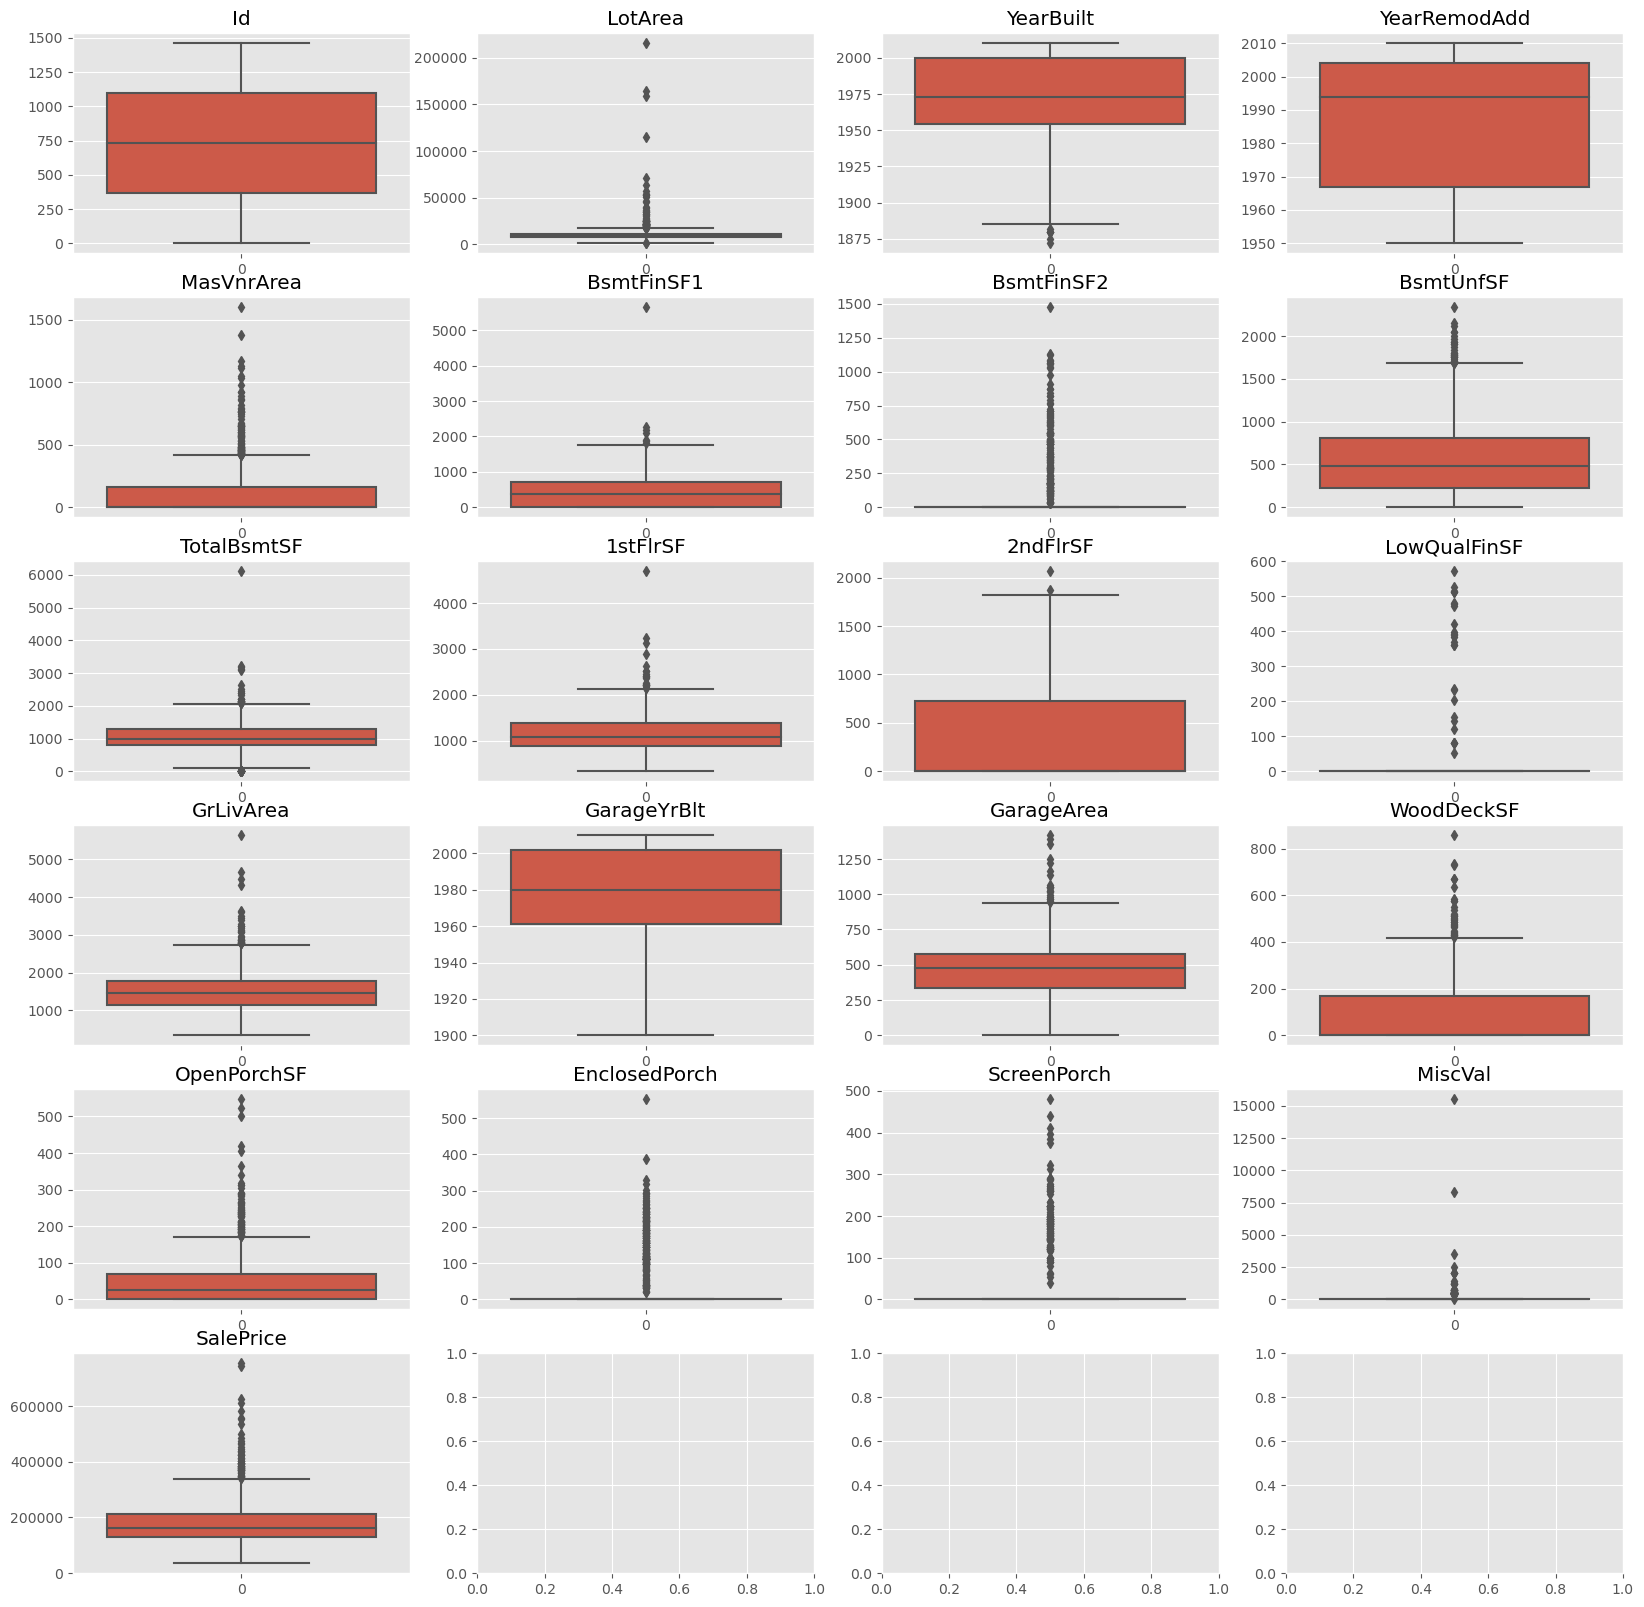

In [34]:
cols = train.columns[train.nunique() > 20]
cols = cols.drop("Neighborhood")

fig, axes = plt.subplots(6, 4, figsize=(20, 20))

for i, name in enumerate(cols):
    r, c = i//4, i%4
    sns.boxplot(data=train[name], ax=axes[r, c])
    axes[r, c].set_title(name)

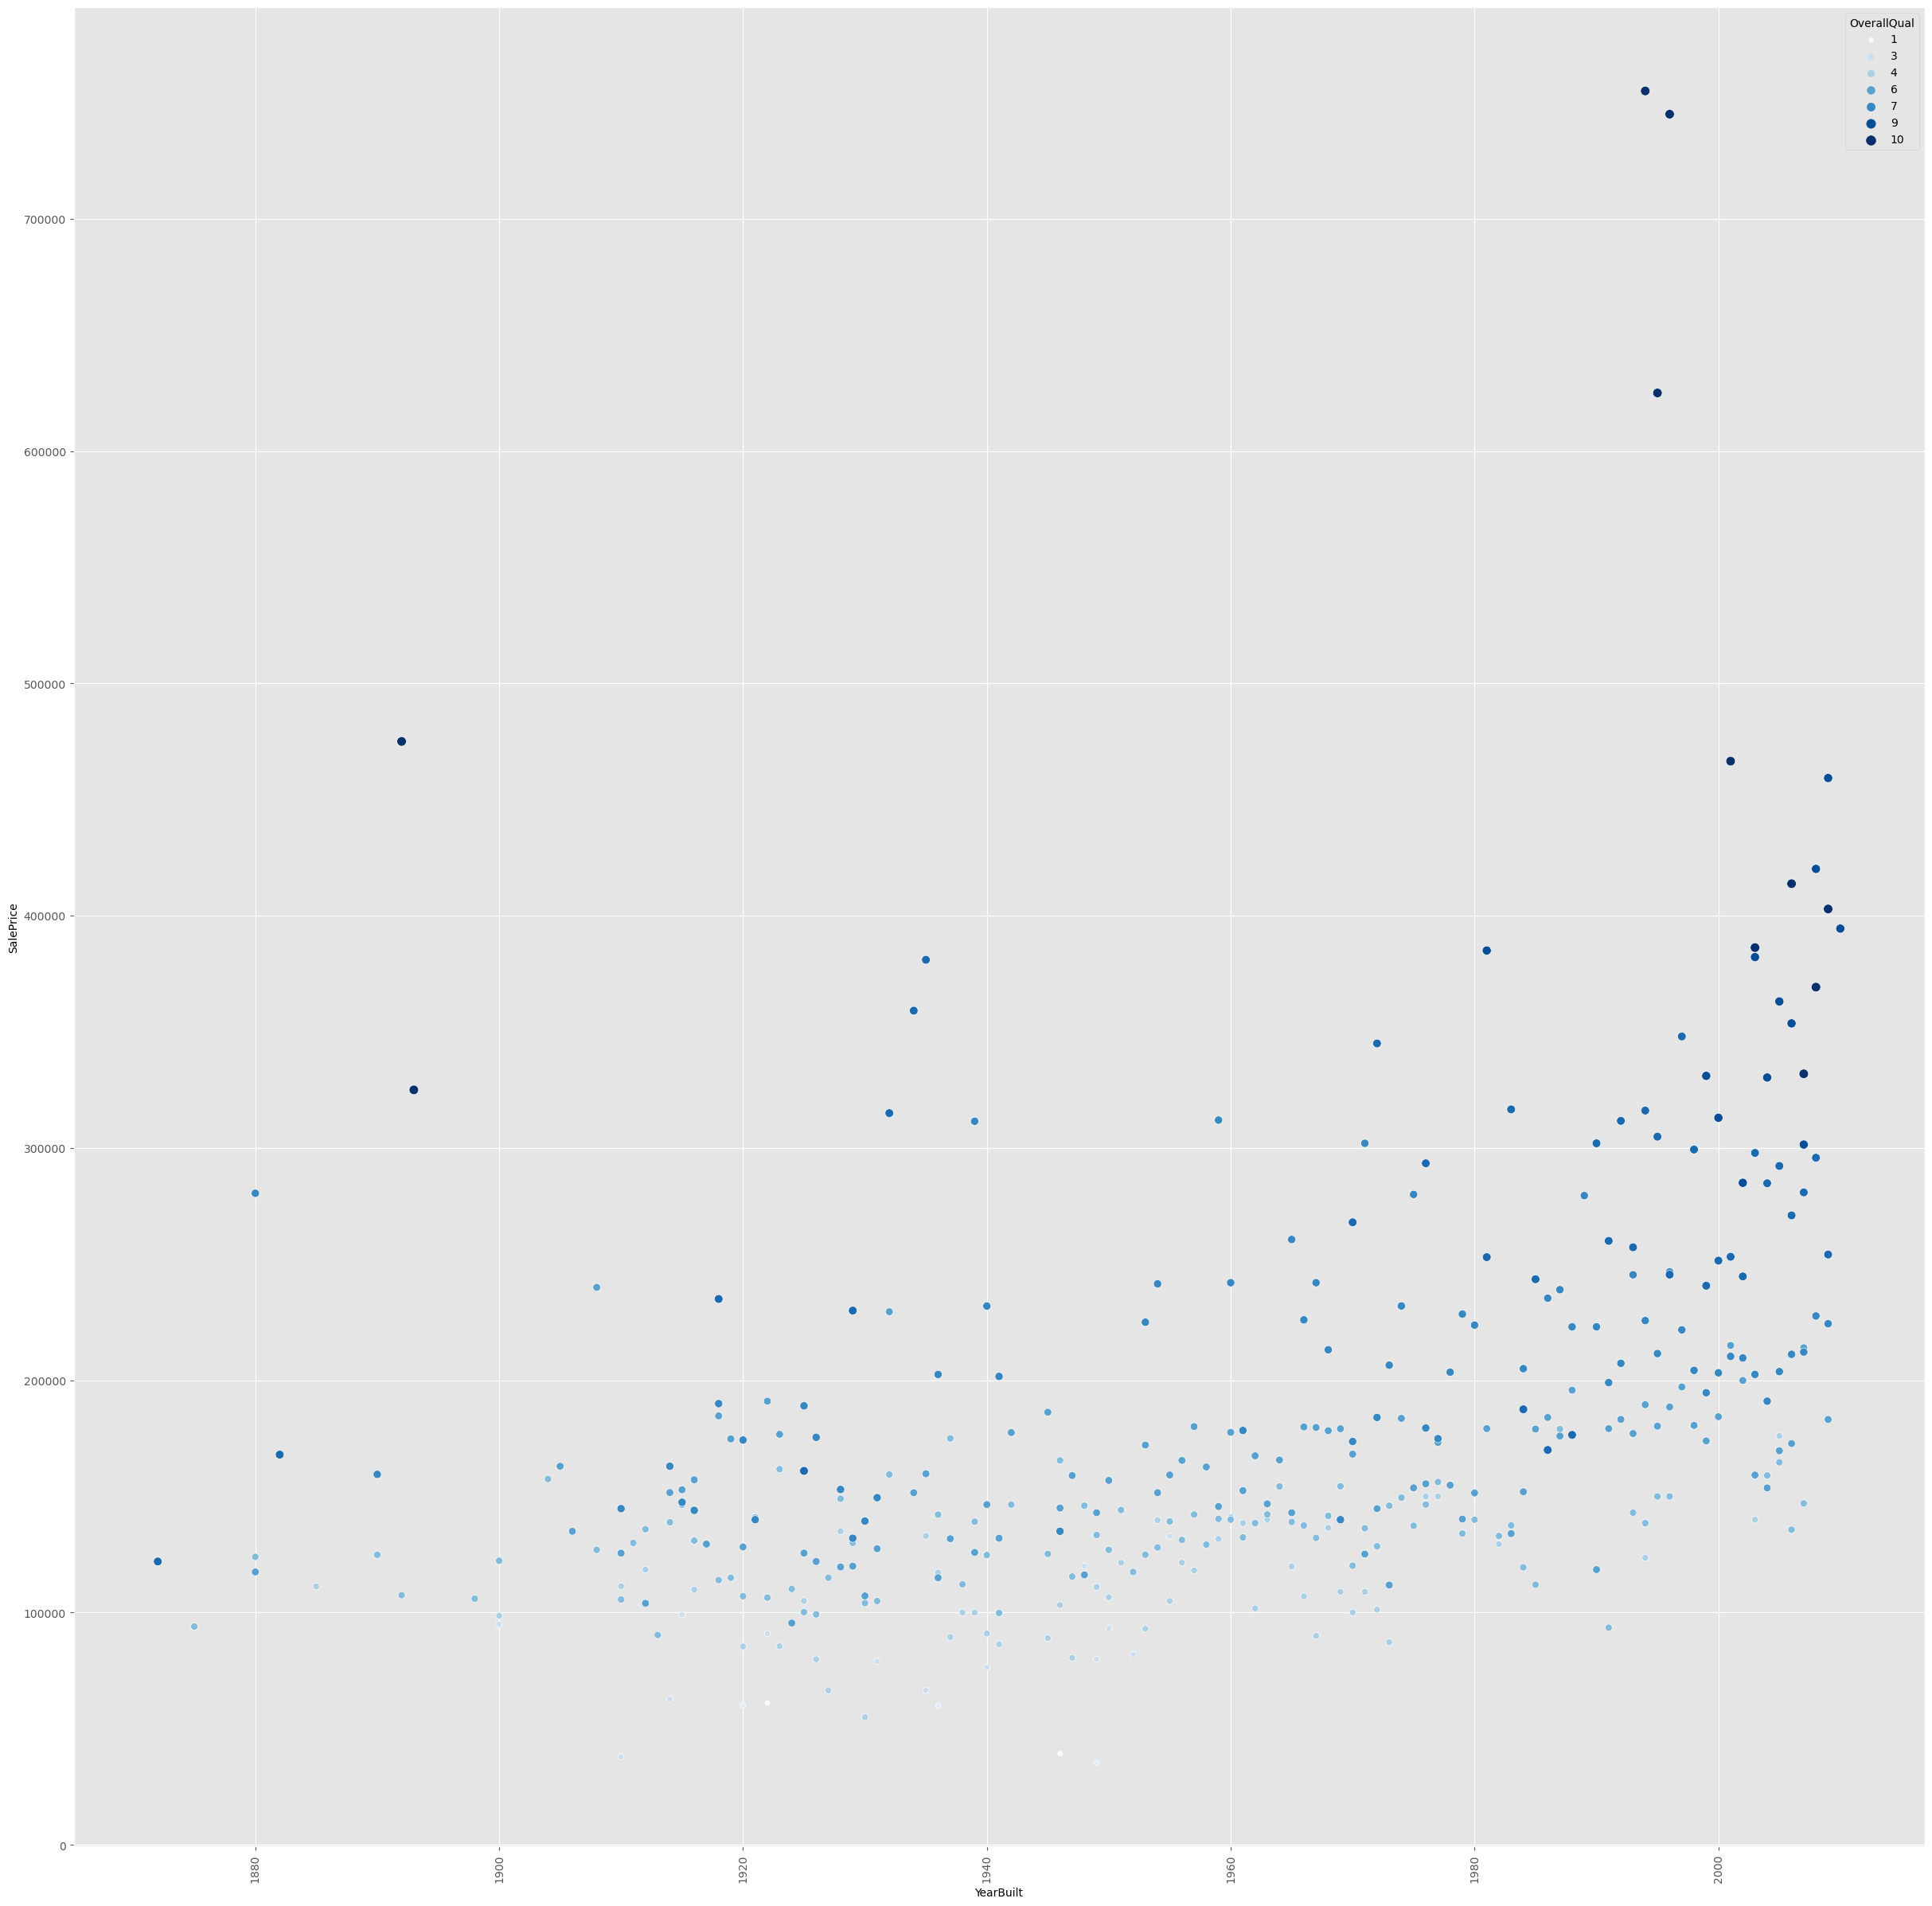

In [35]:
yb = train.groupby(["YearBuilt", "OverallQual"]).agg({"SalePrice": "mean"})
yb.reset_index(inplace=True)
plt.figure(figsize=(30, 30))
sns.scatterplot(data=yb, x="YearBuilt", y="SalePrice", hue="OverallQual", size="OverallQual", palette="Blues")
plt.xticks(rotation=90)

plt.show()

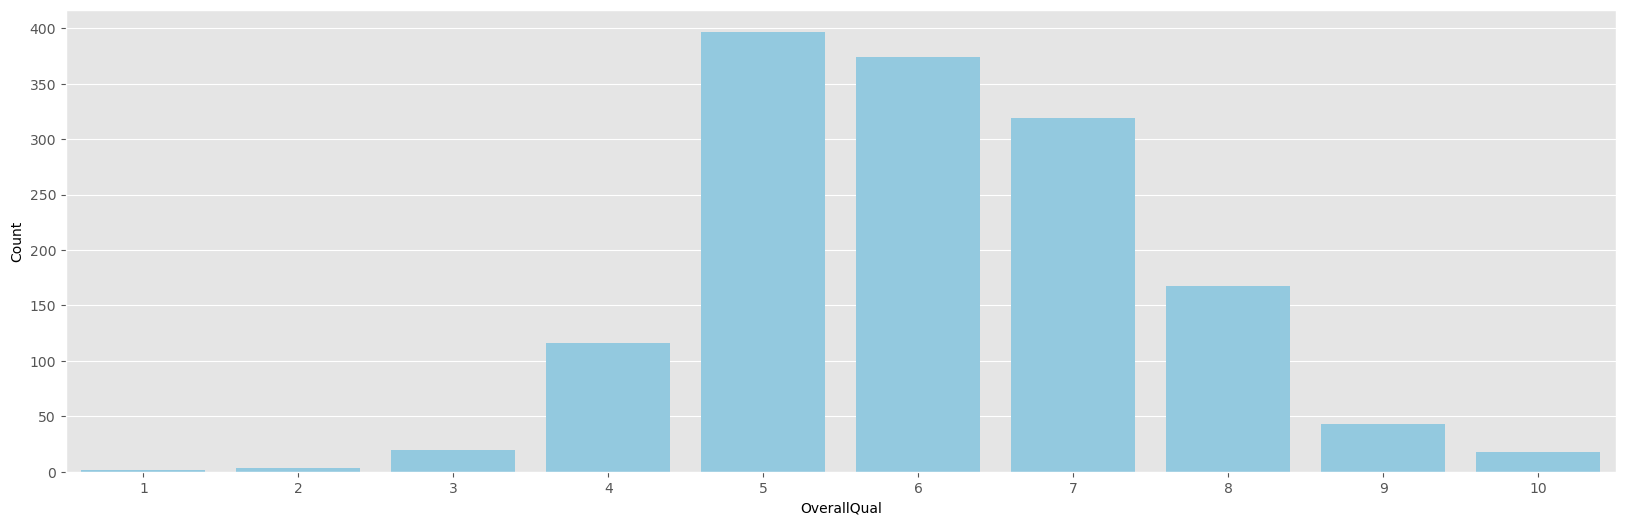

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train, x="OverallQual", color="skyblue")
plt.xlabel("OverallQual")
plt.ylabel("Count")

plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

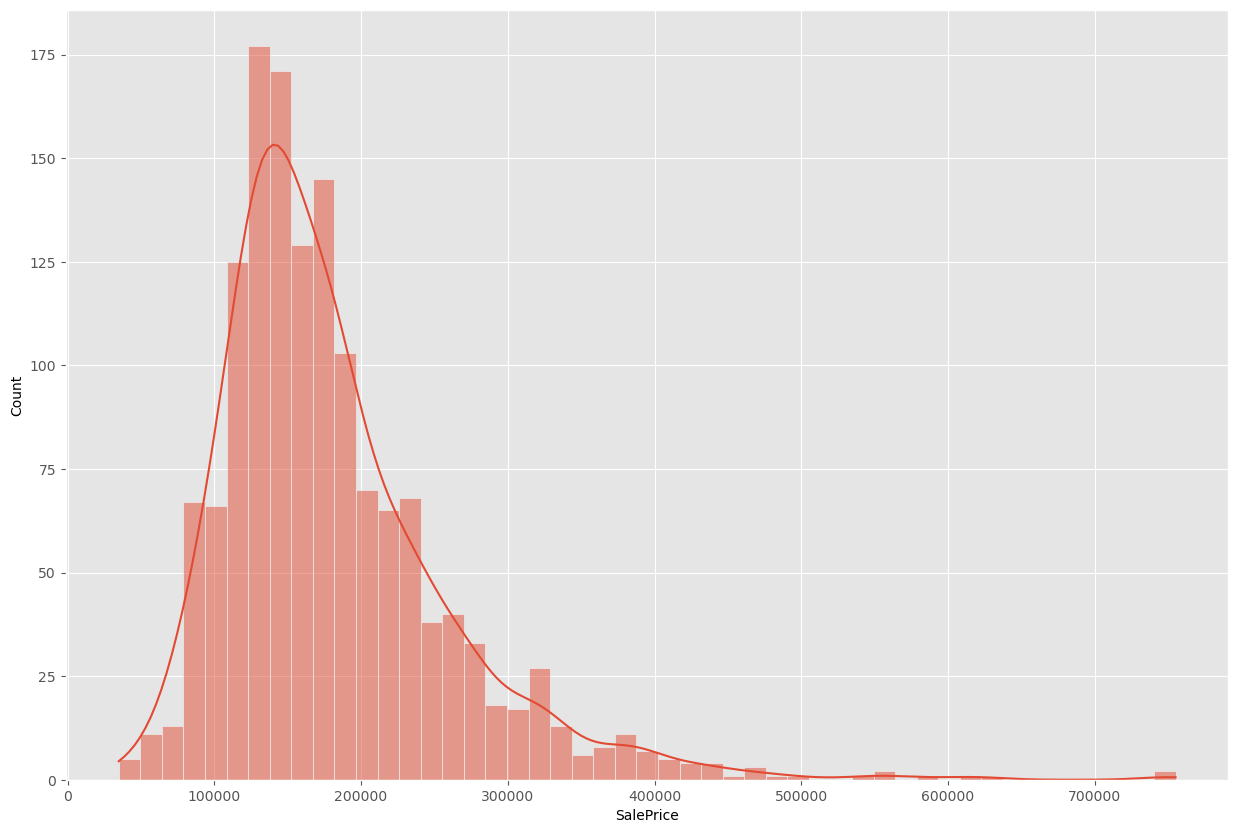

In [37]:
plt.figure(figsize=(15, 10))
sns.histplot(train.SalePrice, kde=True)

([<matplotlib.patches.Wedge at 0x185cf00b6d0>,
 [Text(1.1149699882557937, 0.2816769875031948, '0-100k'),
  Text(0.8338965902590889, 0.7919068611612512, '100k-200k'),
  Text(-0.14315112302962574, 1.1410555446494954, '200k-300k'),
  Text(-0.4343641818355259, -1.064813484859369, '300k+')],
 [Text(0.5817234721334577, 0.146961906523406, '7.9%'),
  Text(0.43507648187430725, 0.41316879712760934, '8.4%'),
  Text(-0.07468754245023952, 0.5953333276432151, '21.4%'),
  Text(-0.2266247905228831, -0.5555548616657578, '62.3%')])

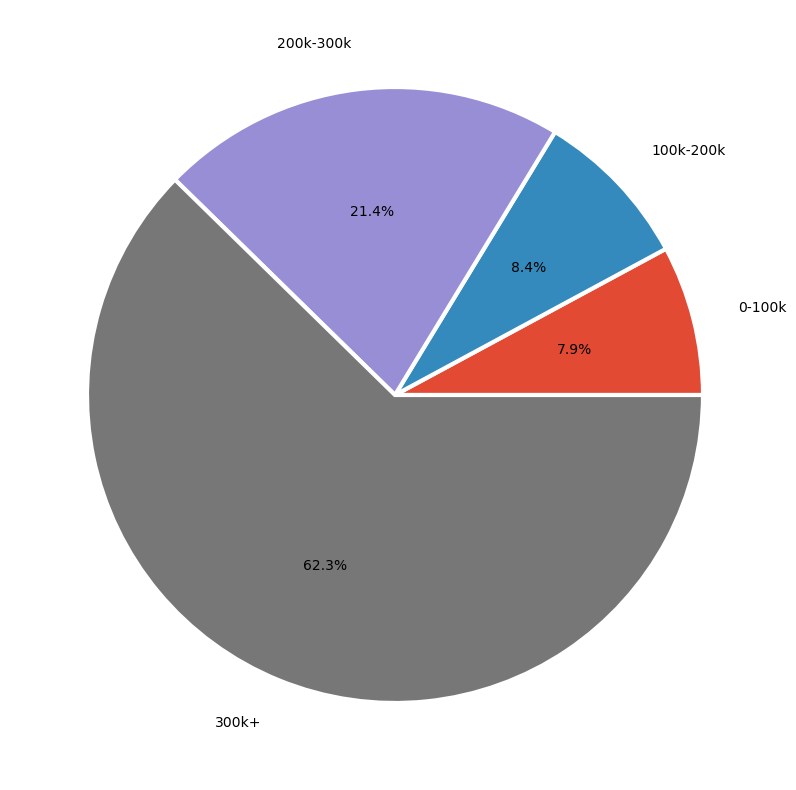

In [38]:
plt.figure(figsize=(15, 10))
bins=[0, 100000, 200000, 300000, train['SalePrice'].max()]
labels = ['0-100k', '100k-200k', '200k-300k', '300k+']
train['price_range'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)

plt.pie(
    train['price_range'].value_counts().sort_values(),
    autopct='%.1f%%',
    labels=labels,
    labeldistance=1.15,
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'}
)

In [39]:
train = train[train["SalePrice"] < 350000]
train.shape

(1404, 76)

([<matplotlib.patches.Wedge at 0x185cf03d780>,
 [Text(1.1399929399069197, 0.15138063602184285, '0-100k'),
  Text(0.9868010704621587, 0.5905282781838119, '100k-200k'),
  Text(0.06686654030860358, 1.1480543827655367, '200k-300k'),
  Text(-0.5161191329577502, -1.0276774983402817, '300k+')],
 [Text(0.5947789251688278, 0.07898120140270061, '4.2%'),
  Text(0.5148527324150394, 0.3081017103567714, '8.8%'),
  Text(0.034886890595793175, 0.5989848953559322, '22.2%'),
  Text(-0.26927954763013057, -0.5361795643514514, '64.8%')])

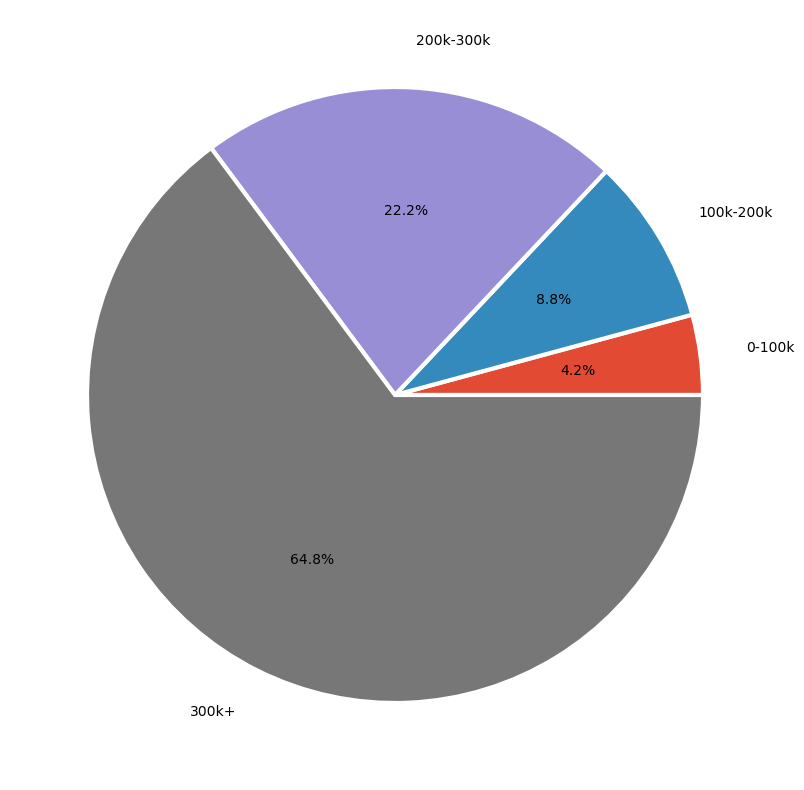

In [40]:
plt.figure(figsize=(15, 10))
bins=[0, 100000, 200000, 300000, train['SalePrice'].max()]
labels = ['0-100k', '100k-200k', '200k-300k', '300k+']
train['price_range'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)

plt.pie(
    train['price_range'].value_counts().sort_values(),
    autopct='%.1f%%',
    labels=labels,
    labeldistance=1.15,
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'}
)

#### Mean SalePrice by Features

In [45]:
def plot_mean_saleprice(column_name):
    groupby_column = train.groupby(column_name).agg({"SalePrice": "mean"})
    
    plt.figure(figsize=(20, 8))
    sns.barplot(data=groupby_column, x=groupby_column.index, y="SalePrice", color="Blue")
    
    max_saleprice_category = groupby_column['SalePrice'].idxmax()
    
    index = groupby_column.index.get_loc(max_saleprice_category)
    plt.gca().patches[index].set_facecolor('red')
    
    plt.xlabel(column_name)
    plt.ylabel('SalePrice')
    plt.title(f'Mean SalePrice by {column_name}')
    if column_name == "YearBuilt":
        plt.xticks(rotation=90)
        
    plt.show()

<Figure size 1000x600 with 0 Axes>

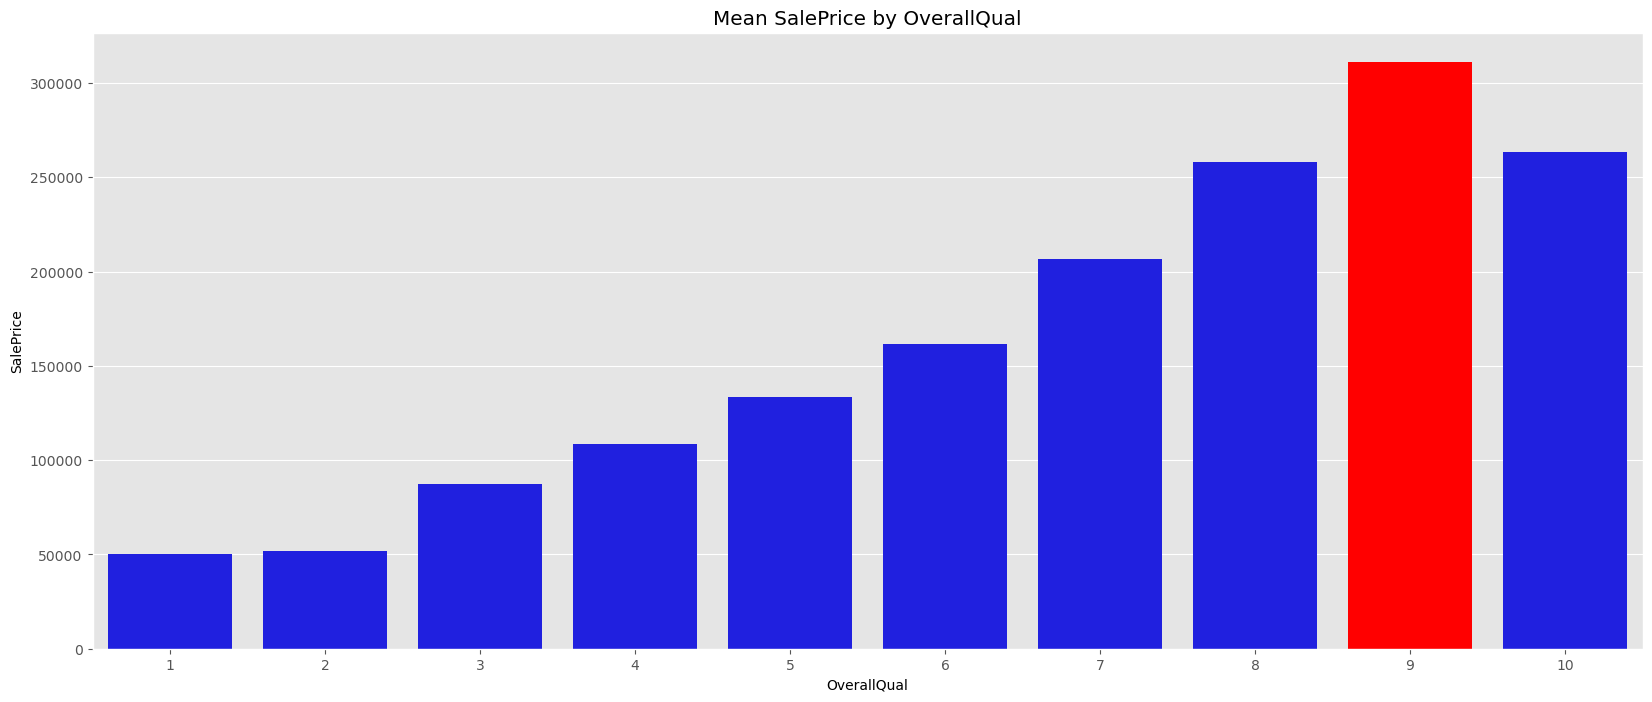

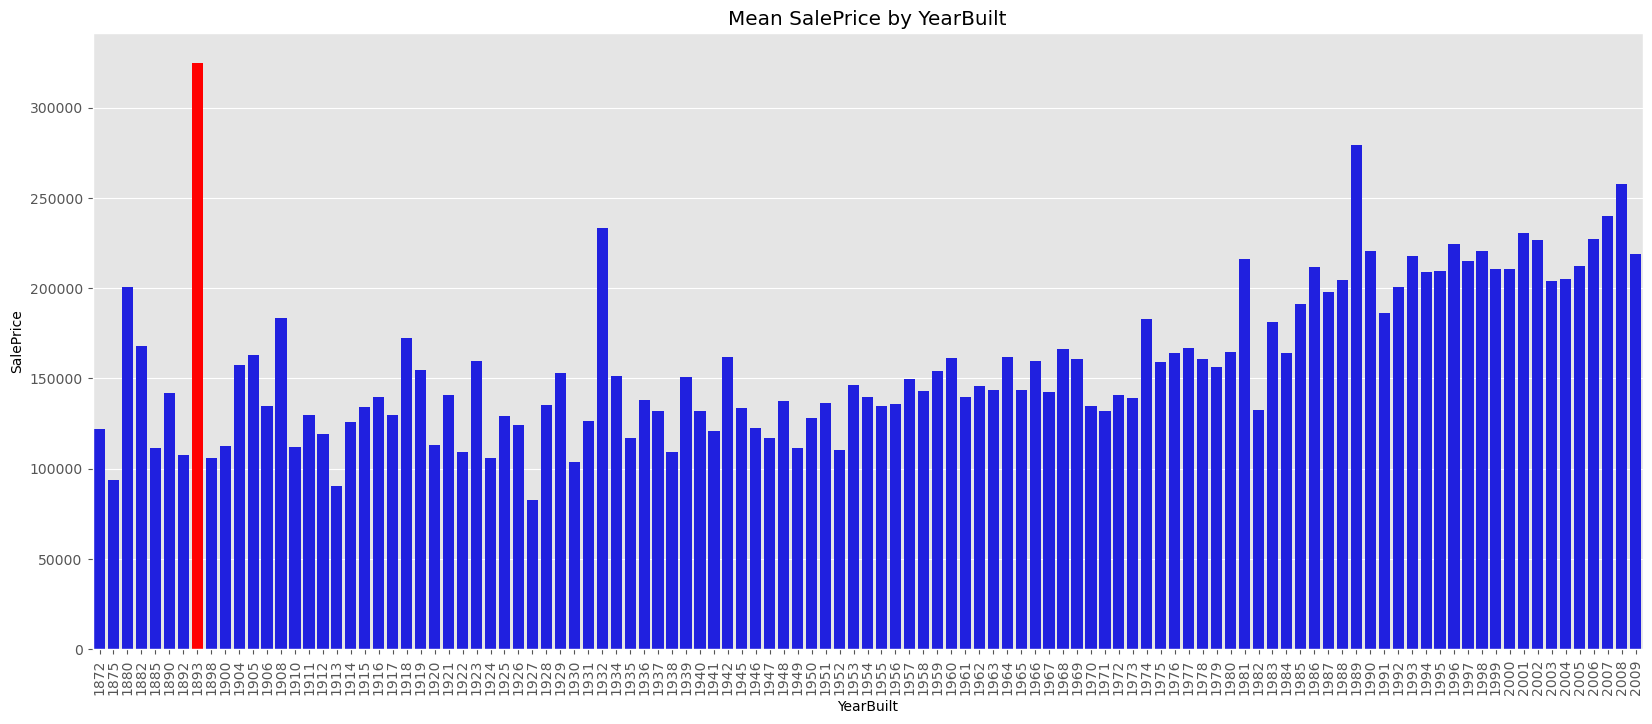

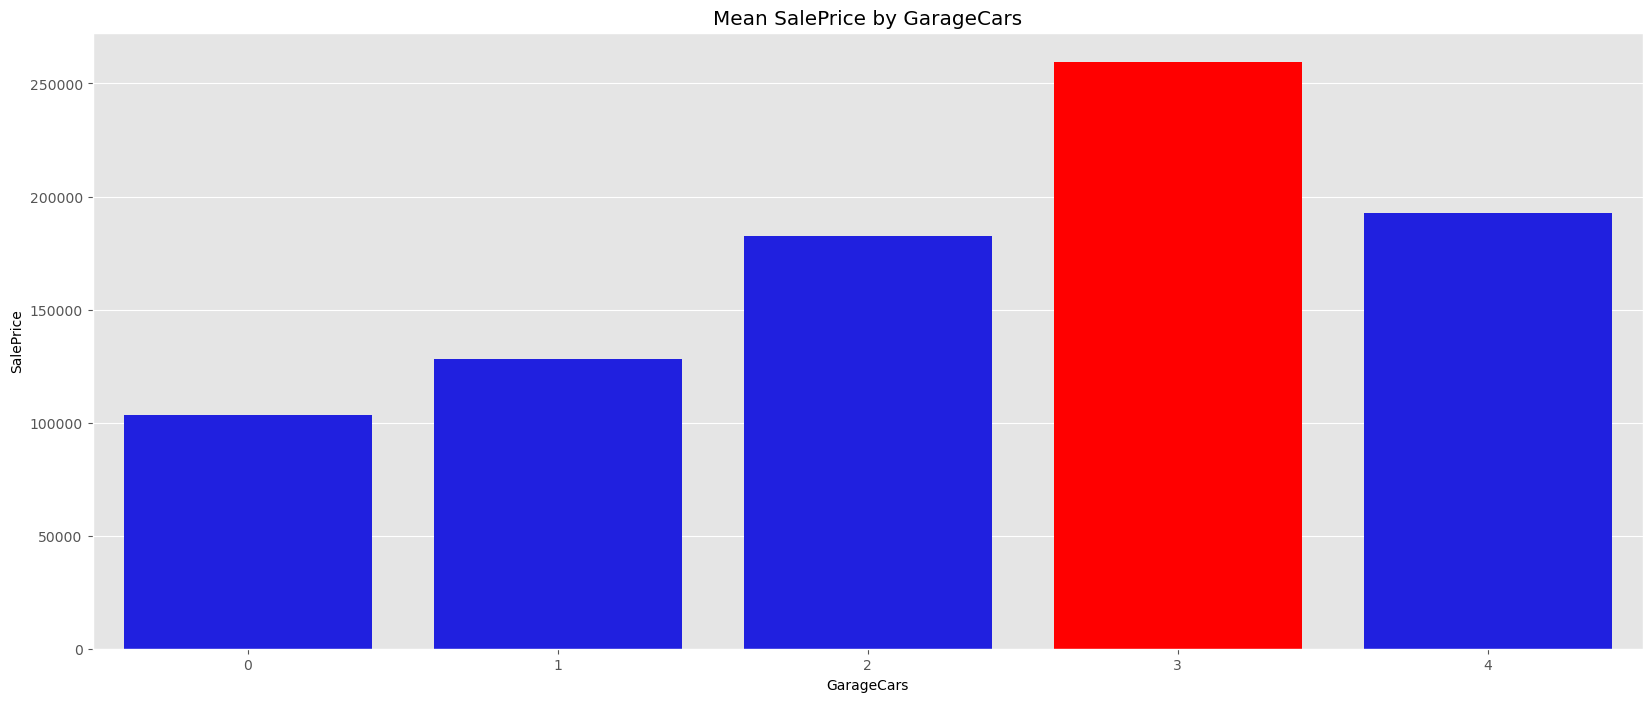

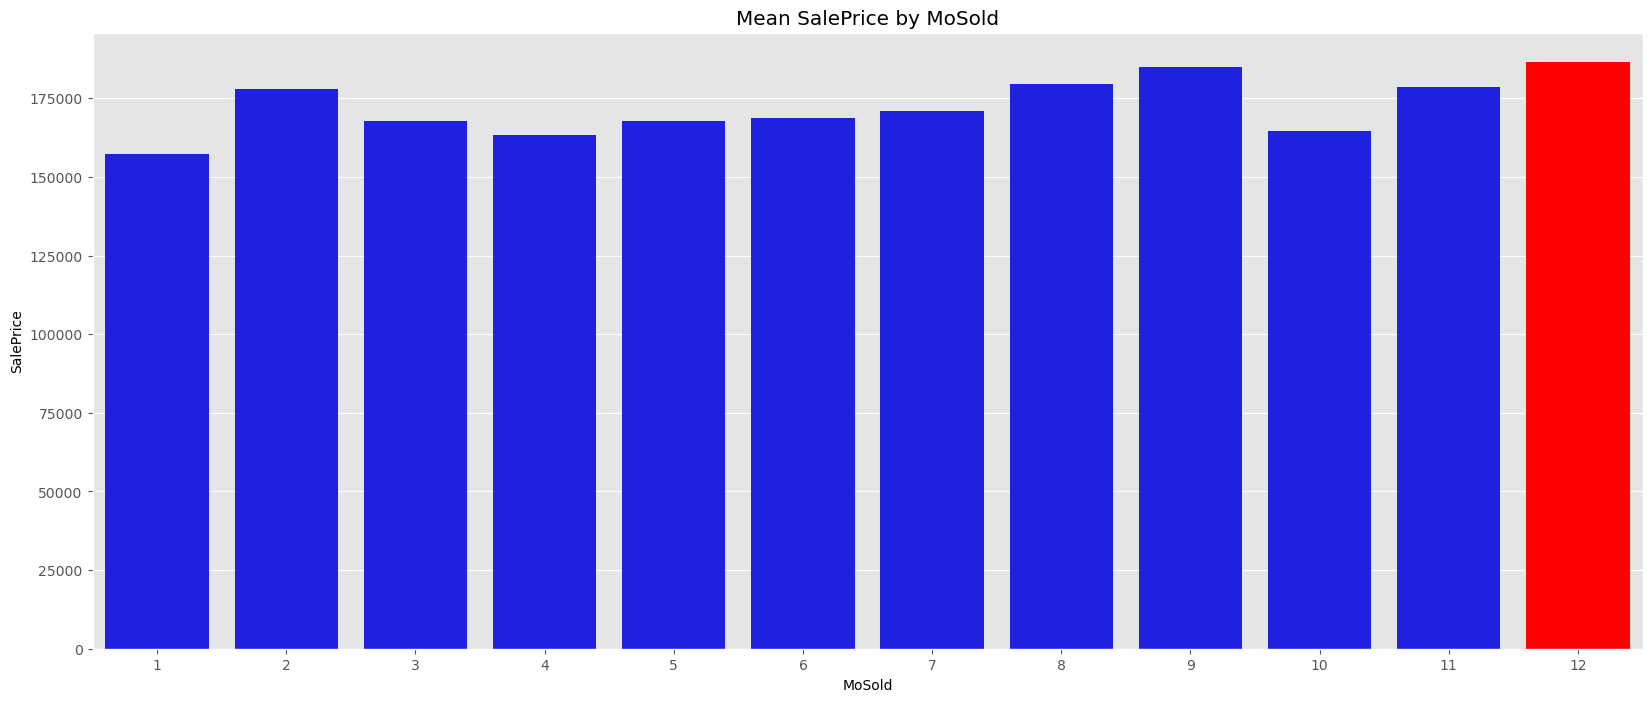

<Figure size 640x480 with 0 Axes>

In [46]:
ap = ['OverallQual', 'YearBuilt', 'GarageCars', 'MoSold']

plt.figure(figsize=(10, 6))

for column in ap:
    plot_mean_saleprice(column)
    
plt.tight_layout()
plt.show()

#### Mean SalePrice by Time Series Data

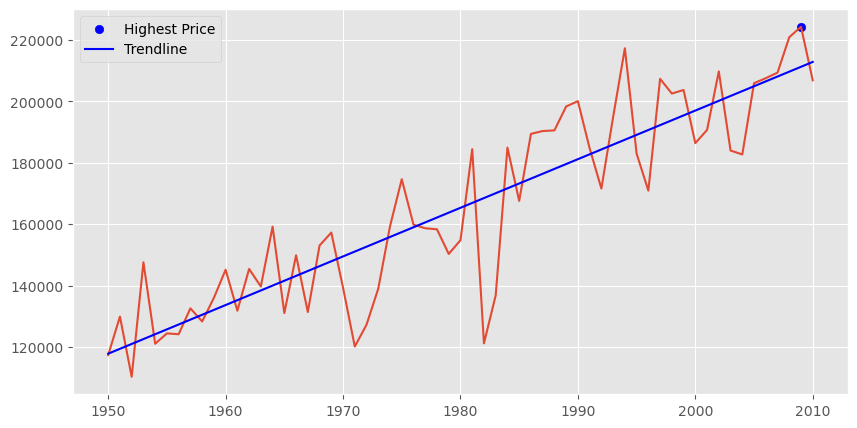

In [50]:
pt = train.groupby('YearRemodAdd').agg({"SalePrice": "mean"})
max_price = pt["SalePrice"].max()
max_year = pt.loc[pt["SalePrice"] == max_price].index[0]

coefficients = np.polyfit(pt.index, pt['SalePrice'], 1)
trendline = np.polyval(coefficients, pt.index)

plt.figure(figsize = (10, 5))
plt.plot(pt.index, pt["SalePrice"])
plt.scatter(max_year, max_price, color="blue", label="Highest Price")
plt.plot(pt.index, trendline, color="blue", label="Trendline")
plt.legend()

In [52]:
import statsmodels.api as sm

def plot_with_autocorrelation(column):
    pt = train.groupby(column).agg({"SalePrice": "mean"})
    max_price = pt["SalePrice"].max()
    max_value_index = pt.loc[pt["SalePrice"] == max_price].index[0]
    
    autocorrelation = sm.tsa.stattools.acf(pt["SalePrice"])
    
    fig, axes = plt.subplots(3, figsize=(15, 8))
    
    axes[0].plot(pt.index, pt["SalePrice"])
    axes[0].scatter(max_value_index, max_price, color='blue', label='Highest Price')
    axes[0].legend()
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Sale Price")
    axes[0].set_title("Average Sale Price by " + column)
    
    sm.graphics.tsa.plot_acf(pt["SalePrice"], ax=axes[1])
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("Autocorrelation")
    axes[1].set_title("Autocorrelation")
    
    sm.graphics.tsa.plot_pacf(pt["SalePrice"], ax=axes[2])
    axes[2].set_xlabel("Lag")
    axes[2].set_ylabel("Partial Autocorrelation")
    axes[2].set_title("partial Autocorrelation")
    
    plt.tight_layout()
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


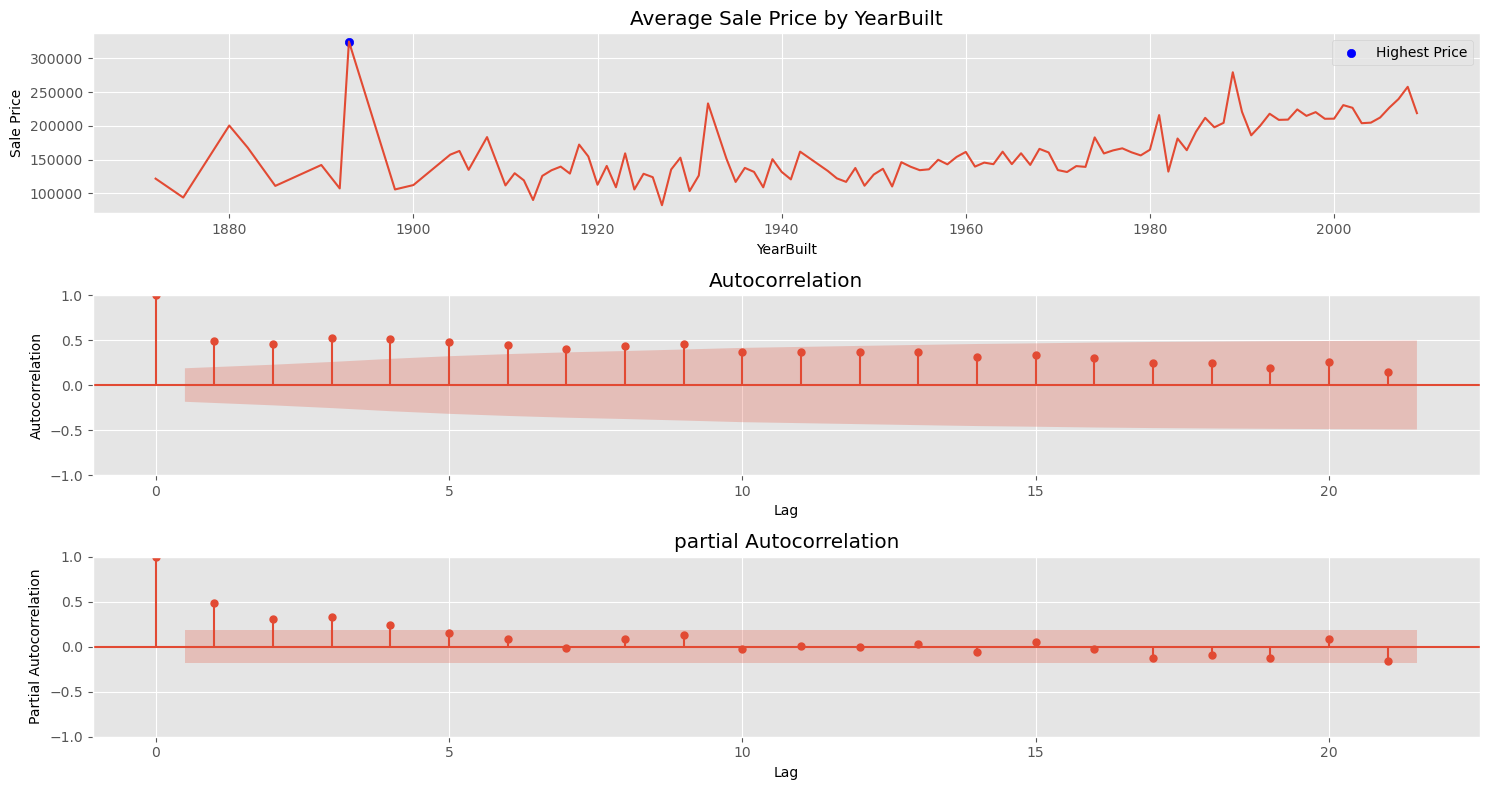

In [53]:
plot_with_autocorrelation("YearBuilt")

In [54]:
train["YrSold"].value_counts()

2009    324
2007    315
2006    302
2008    294
2010    169
Name: YrSold, dtype: int64

In [55]:
train["MoSold"].value_counts()

6     244
7     222
5     200
4     137
8     119
3     100
10     83
11     74
9      60
12     59
1      54
2      52
Name: MoSold, dtype: int64

In [56]:
train[["YrSold", "MoSold"]]

,YrSold,MoSold
0,2008,2
1,2007,5
2,2008,9
3,2006,2
4,2008,12
...,...,...
1455,2007,8
1456,2010,2
1457,2010,5
1458,2010,4


In [64]:
SalesXMonth = train.groupby(["YrSold", "MoSold"]).agg({"SalePrice" : "mean"})
SalesXMonth['DateSale'] = pd.to_datetime(SalesXMonth.index.map(lambda x: f'{x[0]}-{x[1]}-01'))
SalesXMonth = SalesXMonth.reset_index(drop=True)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


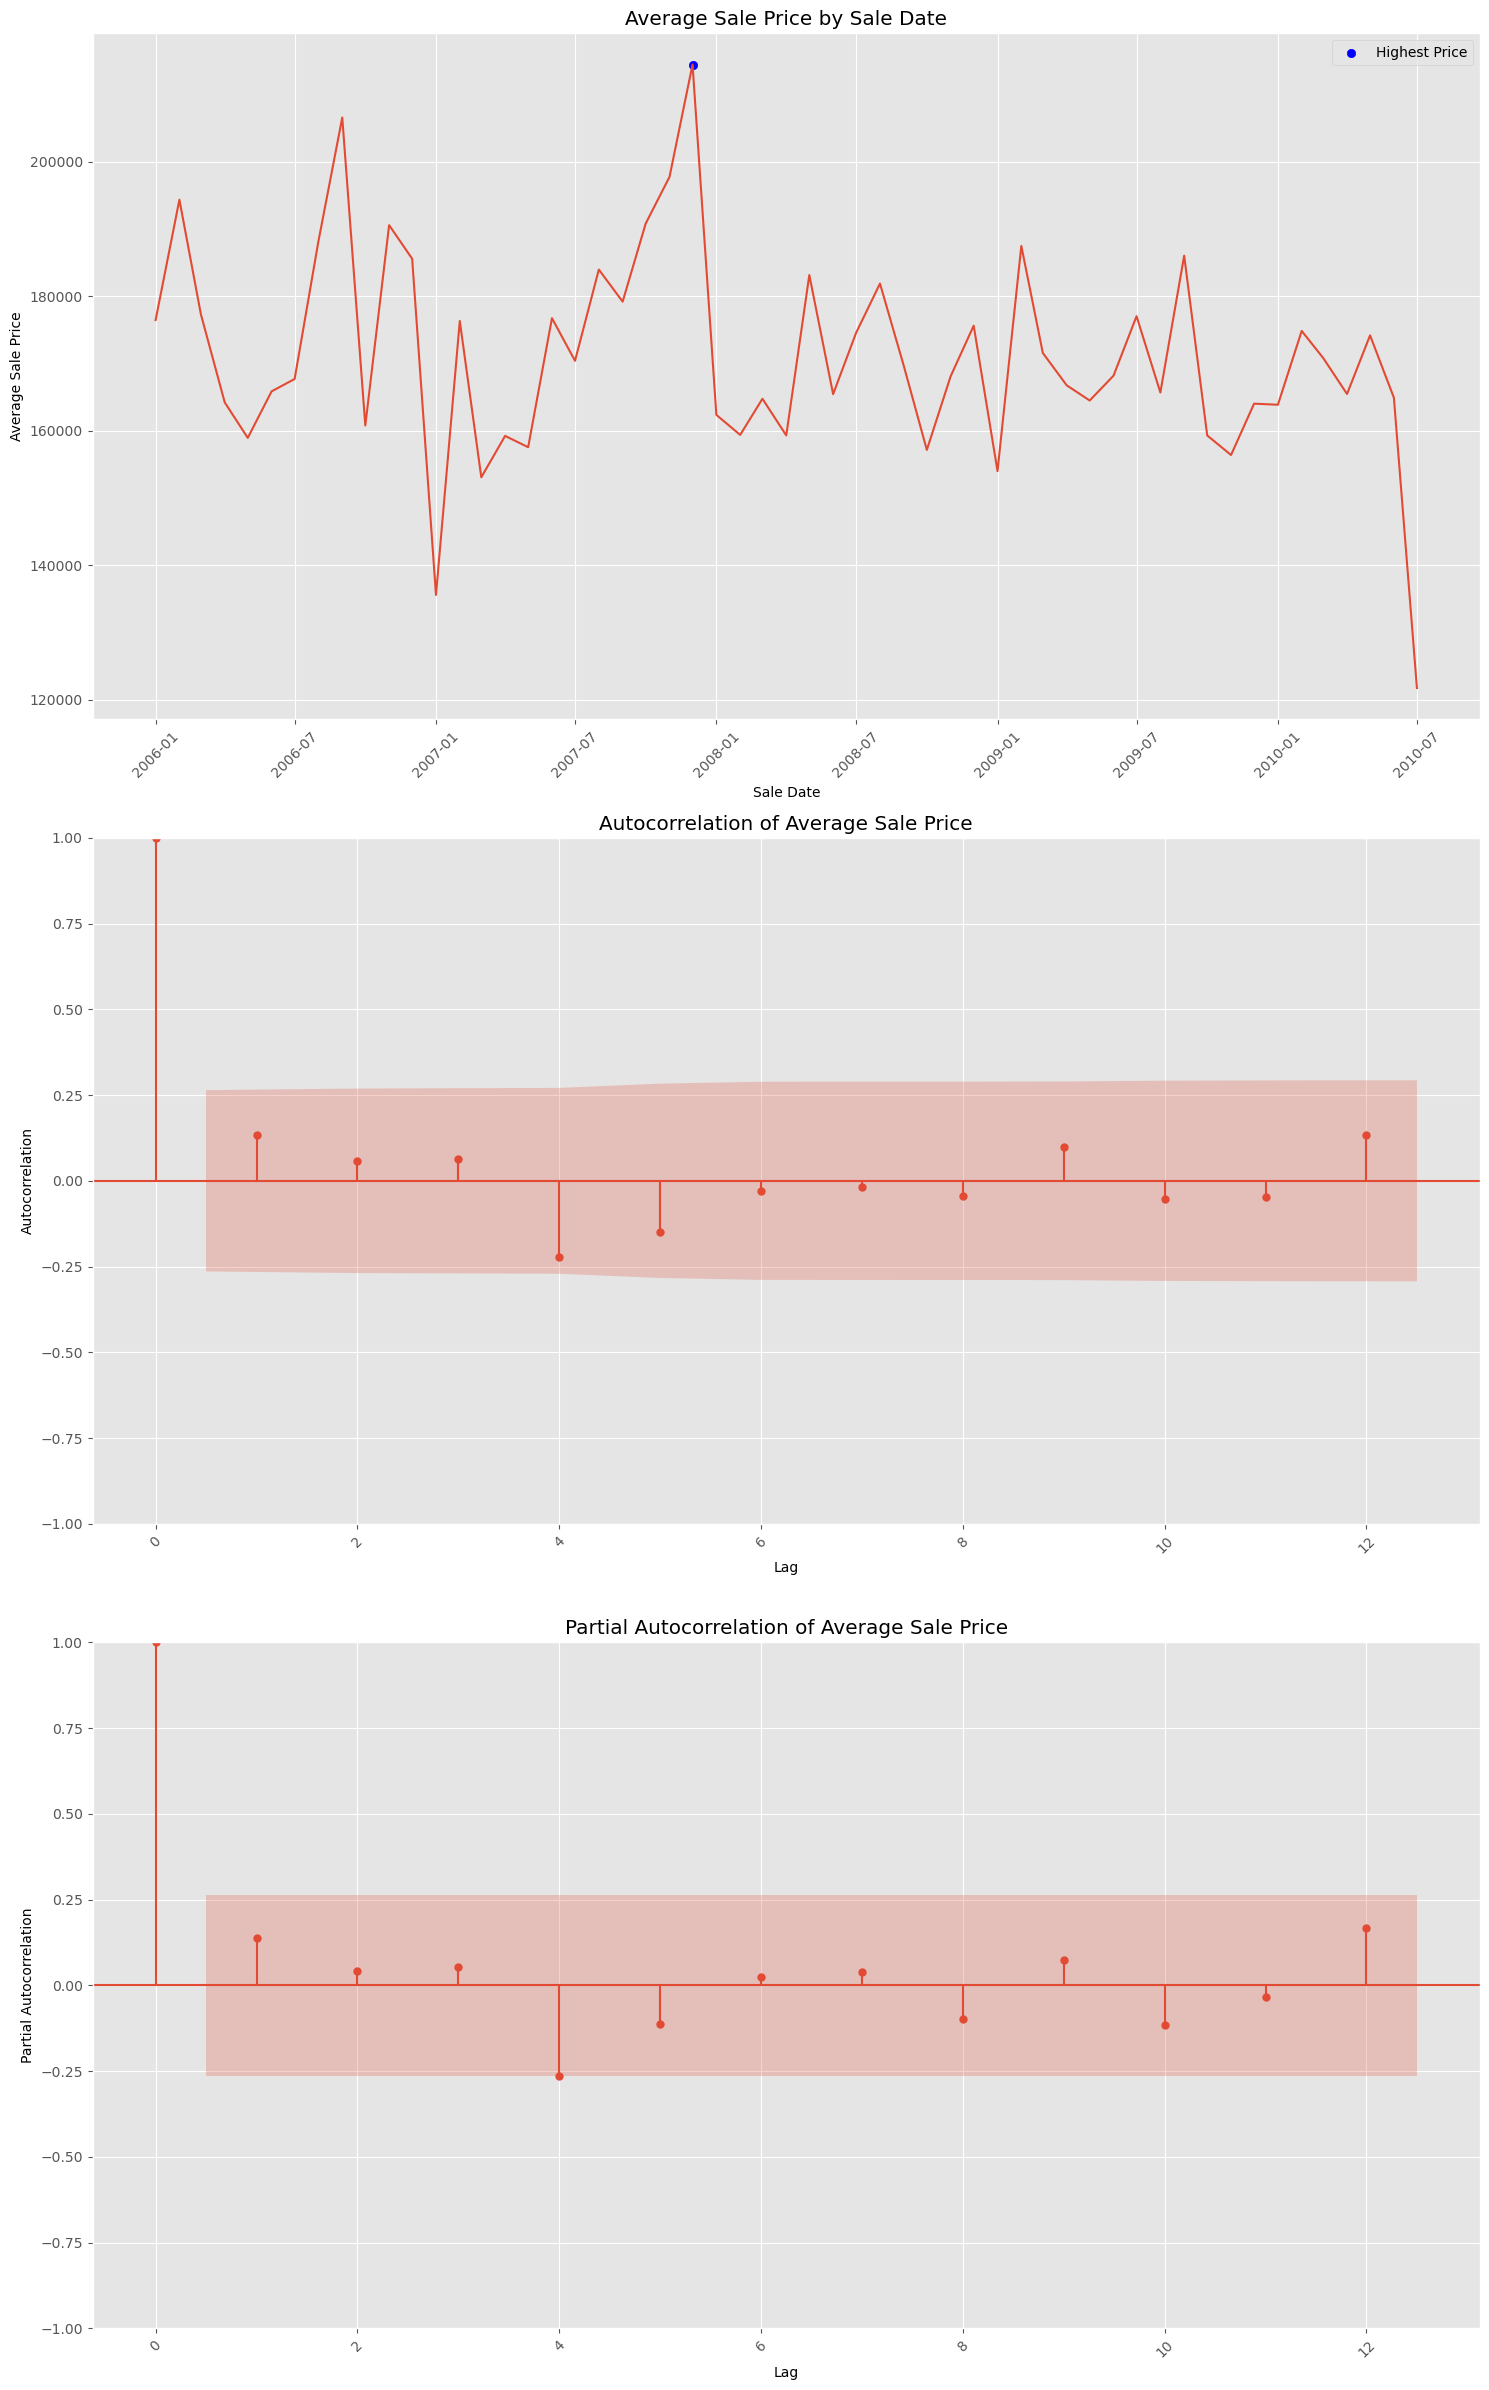

In [65]:
max_index = SalesXMonth['SalePrice'].idxmax()
max_date = SalesXMonth.loc[max_index, 'DateSale']
max_price = SalesXMonth.loc[max_index, 'SalePrice']
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

axes[0].plot(SalesXMonth['DateSale'], SalesXMonth['SalePrice'])
axes[0].scatter(max_date, max_price, color='blue', label='Highest Price')
axes[0].set_xlabel('Sale Date')
axes[0].set_ylabel('Average Sale Price')
axes[0].set_title('Average Sale Price by Sale Date')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

sm.graphics.tsa.plot_acf(SalesXMonth['SalePrice'], lags=12, ax=axes[1])
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Autocorrelation')
axes[1].set_title('Autocorrelation of Average Sale Price')
axes[1].tick_params(axis='x', rotation=45)

sm.graphics.tsa.plot_pacf(SalesXMonth['SalePrice'], lags=12, ax=axes[2])
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Partial Autocorrelation')
axes[2].set_title('Partial Autocorrelation of Average Sale Price')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Feature Engineering

In [68]:
train["GarageVolume"] = train["GarageCars"] * train["GarageArea"]
train["GarageAreaRatio"] = train["GarageArea"] / train["GrLivArea"]

In [69]:
train["ExterQual"].value_counts()

TA    903
Gd    462
Ex     25
Fa     14
Name: ExterQual, dtype: int64

In [70]:
train.replace({"ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)

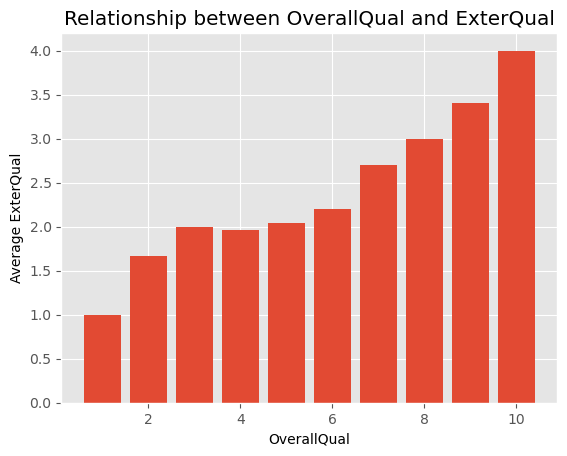

In [71]:
quality_data = train.groupby("OverallQual")["ExterQual"].mean()

plt.bar(quality_data.index, quality_data.values)
plt.xlabel("OverallQual")
plt.ylabel("Average ExterQual")
plt.title("Relationship between OverallQual and ExterQual")
plt.show()

In [72]:
train["OverallQual"] = train["OverallQual"] / train["OverallQual"].max()

train["ExterQual"] = (train["ExterQual"] - train["ExterQual"].min()) / (train["ExterQual"].max() - train["ExterQual"].min())

train["TotalQuall"] = (train["OverallQual"] + train["ExterQual"]) / 2

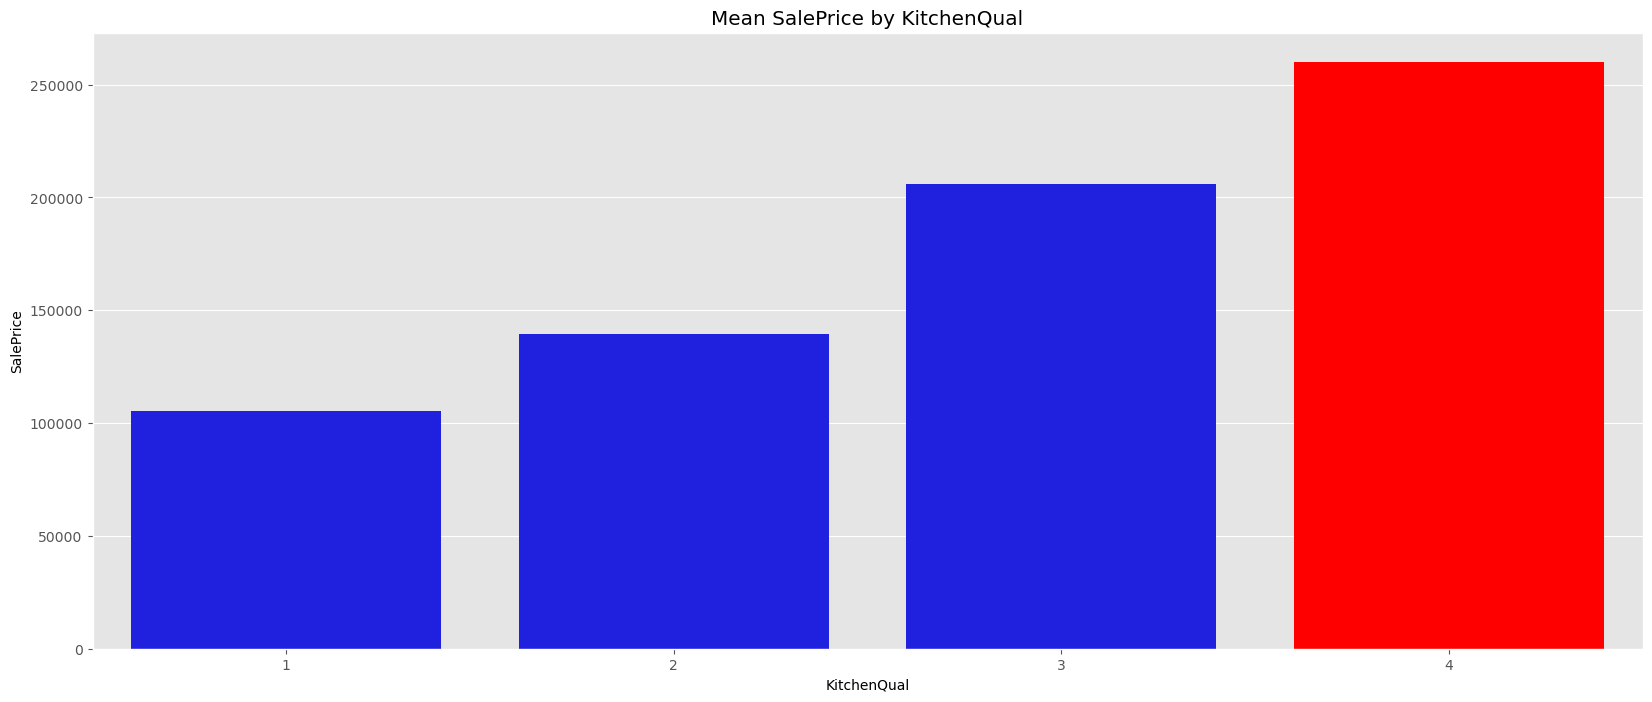

In [73]:
train.replace({"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)

plot_mean_saleprice("KitchenQual")

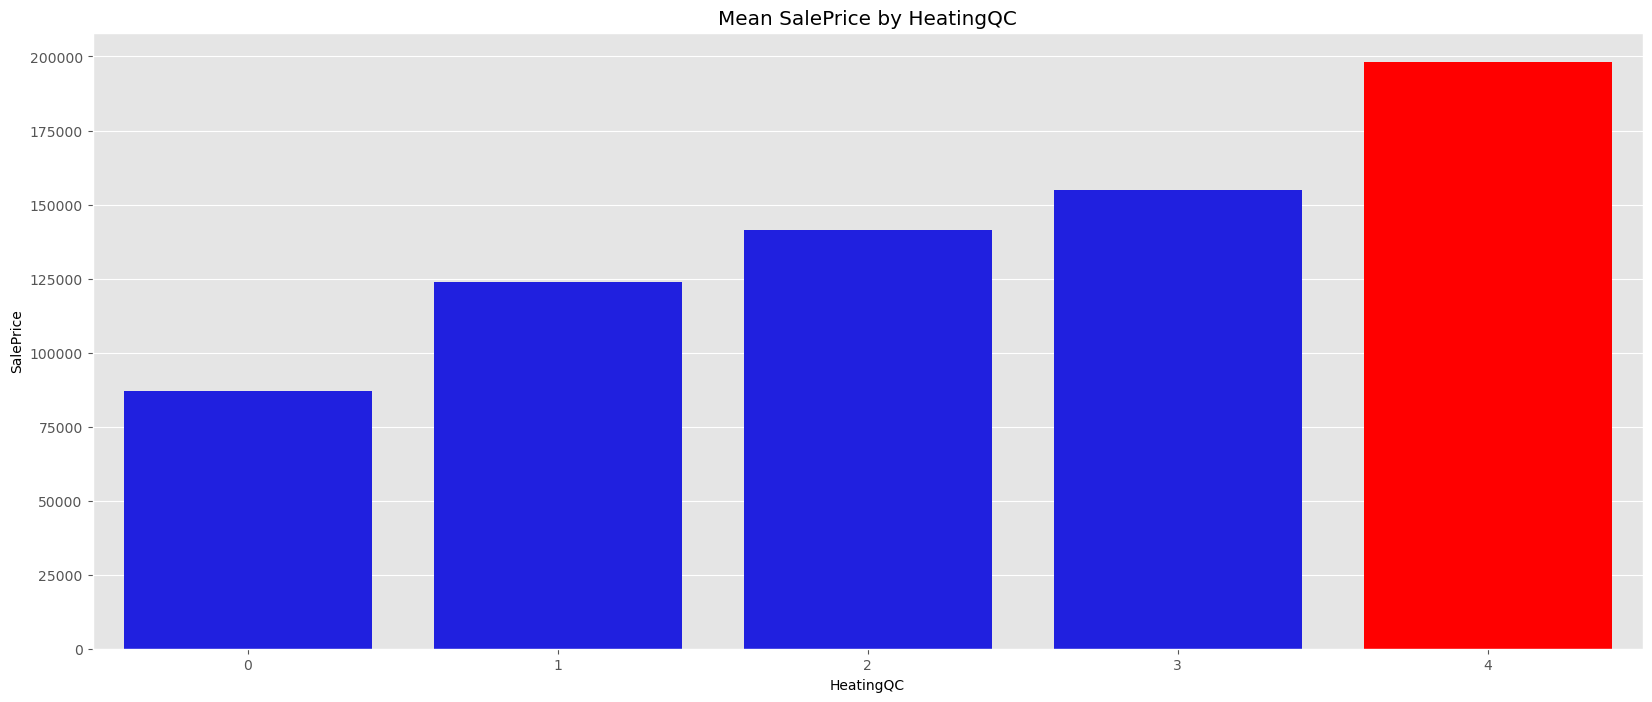

In [74]:
train.replace({"HeatingQC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)

plot_mean_saleprice("HeatingQC")

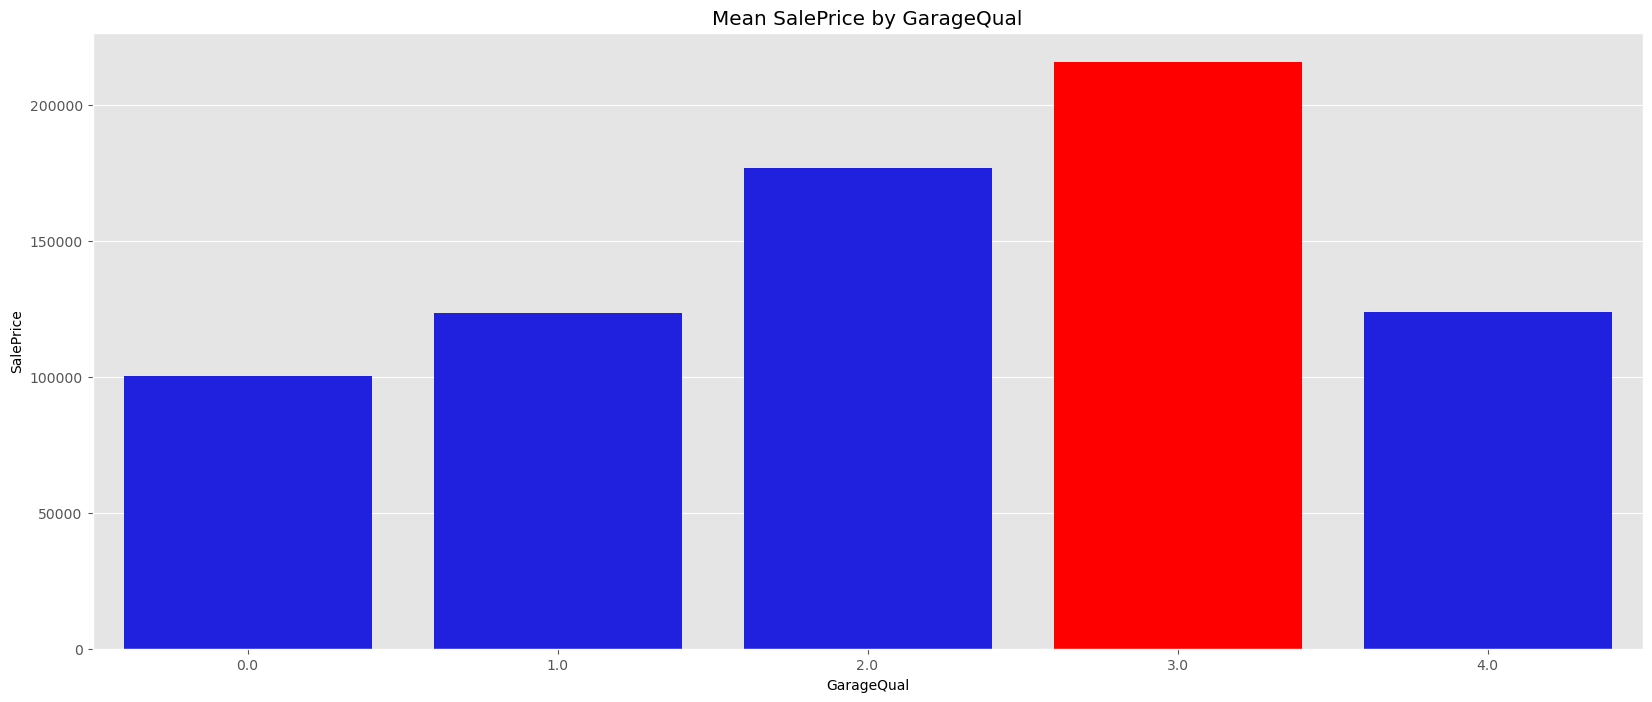

In [75]:
train.replace({"GarageQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)

plot_mean_saleprice("GarageQual")

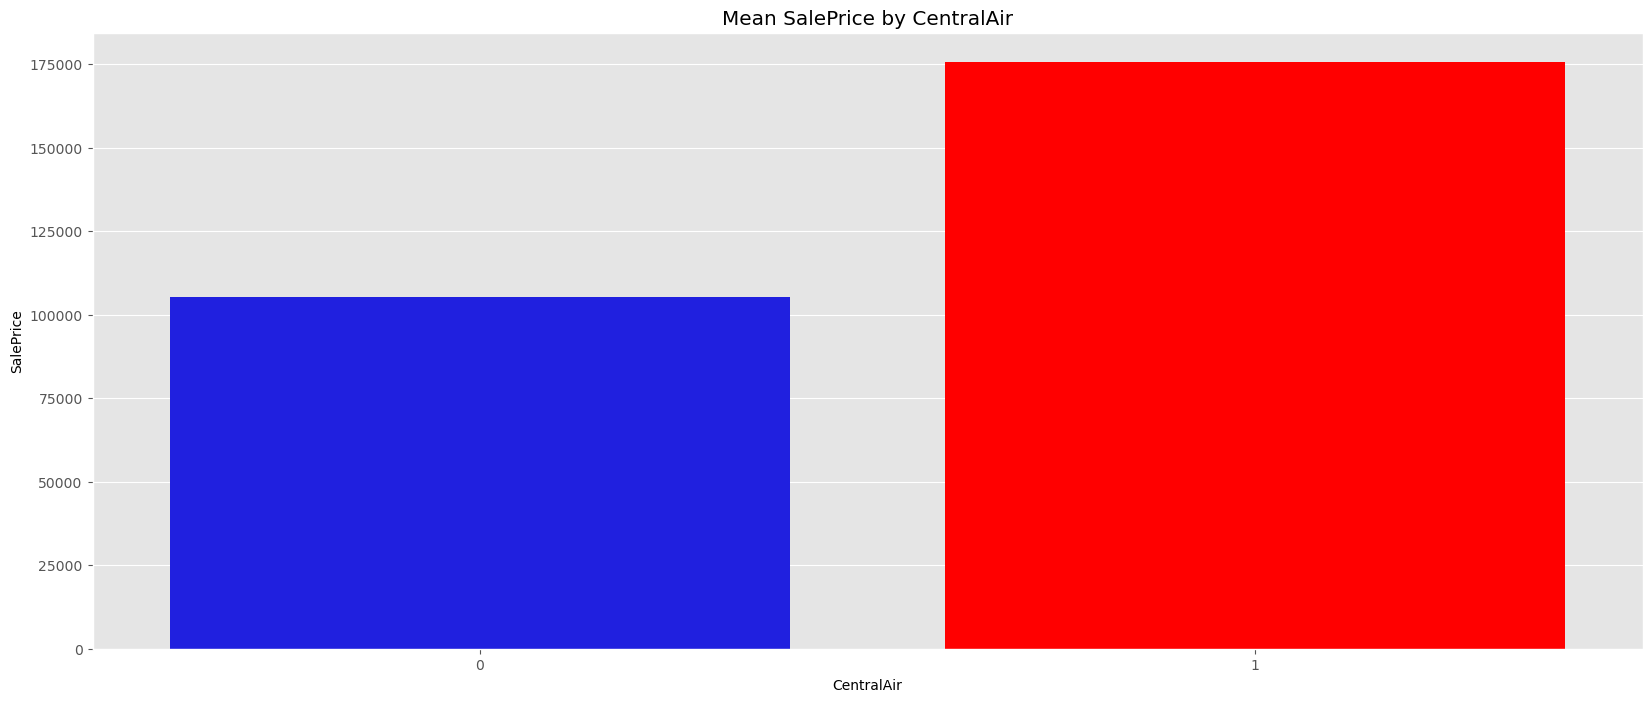

In [76]:
train.replace({"CentralAir": {"Y" : 1, "N" : 0}}, inplace=True)

plot_mean_saleprice("CentralAir")

C:\Users\User\AppData\Local\Temp\ipykernel_5056\300741084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr().nlargest(20, "SalePrice")


<Axes: >

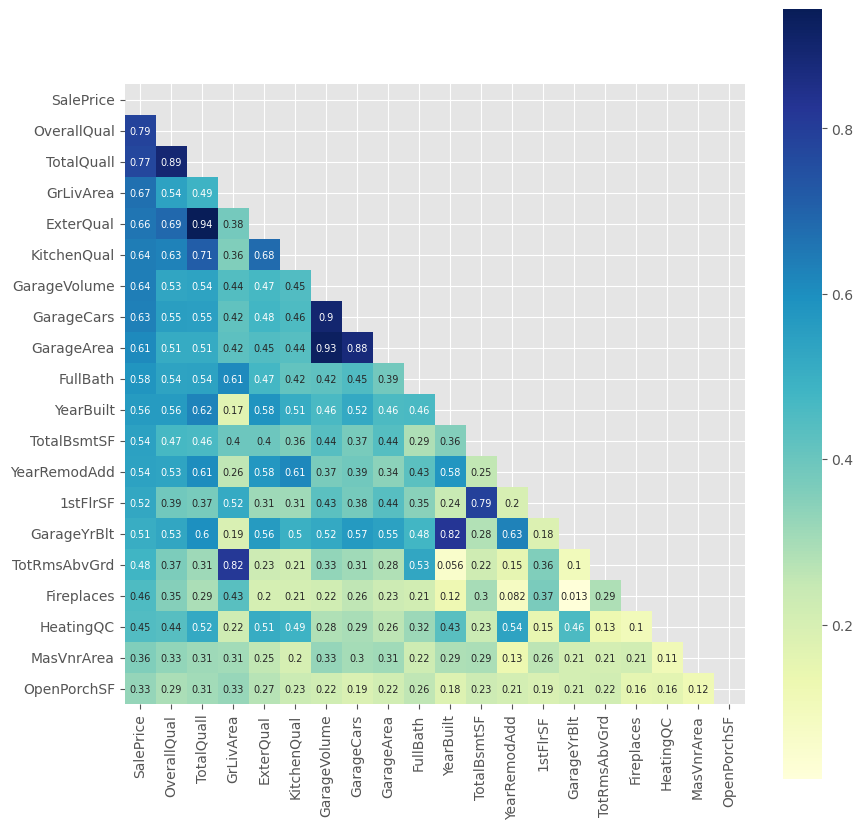

In [77]:
corrmat = train.corr().nlargest(20, "SalePrice")
corrmat = corrmat.T.sort_values("SalePrice", ascending = False)[:20]
mask = np.triu(np.ones_like(corrmat))
plt.figure(figsize = (10, 10))
sns.heatmap(data = corrmat, mask = mask, annot = True, square = True, cmap = "YlGnBu", annot_kws = {"fontsize" : 7})

#### Preprocessing

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class Dataset:
    def __init__(self, df, is_train=True):
        self.df = df
        self.is_train = is_train

    def preprocess_data(self):
        processed_df = self.df.copy()
        
        if self.is_train:
            processed_df = processed_df[processed_df["SalePrice"] < 350000]
        # Apply preprocessing steps
        processed_df = processed_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', "Id"], axis=1)
        processed_df["GarageVolume"] = processed_df["GarageCars"] * processed_df["GarageArea"]
        processed_df["GarageAreaRatio"] = processed_df["GarageArea"] / processed_df["GrLivArea"]
        processed_df.replace({"ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
        processed_df["OverallQual"] = processed_df["OverallQual"] / processed_df["OverallQual"].max()
        processed_df["ExterQual"] = (processed_df["ExterQual"] - processed_df["ExterQual"].min()) / (processed_df["ExterQual"].max() - processed_df["ExterQual"].min())
        processed_df["TotalQuall"] = (processed_df["OverallQual"] + processed_df["ExterQual"]) / 2
        processed_df.replace({"HeatingQC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
        processed_df.replace({"GarageQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
        processed_df.replace({"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
        processed_df.replace({"CentralAir": {"Y" : 1, "N" : 0}}, inplace=True)

        categorical_cols = processed_df.select_dtypes(include=['object']).columns
        label_encoder = LabelEncoder()
        processed_df[categorical_cols] = processed_df[categorical_cols].apply(label_encoder.fit_transform)
        
        numeric_cols = processed_df.select_dtypes(include=['float64', 'int64']).columns
        imputer = SimpleImputer(strategy='median')
        processed_df[numeric_cols] = imputer.fit_transform(processed_df[numeric_cols])
        
        return processed_df
    def get_train_test_data(self):
        processed_df = self.preprocess_data()

        X = processed_df

        if self.is_train:
            X = X.drop('SalePrice', axis=1)
            y = processed_df['SalePrice']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            return X_train, X_test, y_train, y_test
        else:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

            return X

In [81]:
df_train = pd.read_csv("../kaggle/House Prices/train.csv")
dataset_train = Dataset(df_train, is_train=True)
X_train, X_test, y_train, y_test = dataset_train.get_train_test_data()

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (1123, 76)
Dimensiones de X_test: (281, 76)
Dimensiones de y_train: (1123,)
Dimensiones de y_test: (281,)


#### XGBoost Regressor

In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [85]:
# Train the XGB model

def xgb_train(X_train,X_test):
    model_params = {
    'objective': 'reg:squarederror',
    'boosting_type': 'gbtree',
    'learning_rate': 0.1,
    'n_estimators': 500,
    'max_depth': 3,
#     'min_child_weight': 1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
    'verbosity': 0,
    'early_stopping_rounds':100
    }
    xgb_model = XGBRegressor(**model_params)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=0)

    # Predict on the validation set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error: ", rmse)
    return xgb_model

xgb_model = xgb_train(X_train,X_test)

Root Mean Squared Error:  18618.95702797818


In [87]:
df_test = pd.read_csv("../kaggle/House Prices/test.csv")
submission = pd.read_csv("../kaggle/House Prices/sample_submission.csv")

In [88]:
dataset_test = Dataset(df_test, is_train=False)
X_test = dataset_test.get_train_test_data()

print("Dimensiones de X_test:", X_test.shape)

Dimensiones de X_test: (1459, 76)


In [89]:
baseline_test_pred = xgb_model.predict(X_test)

In [90]:
submission['SalePrice'] = pd.Series(baseline_test_pred)

submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,131313.656250
1,1462,169180.890625
2,1463,180195.265625
3,1464,194849.859375
4,1465,172592.921875
